# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## Data Validation:

The dataset consists of **15,000 rows and 8 columns** before any validation and cleaning <br>
I have validated and cleaned the columns as following:
- **week**: 6 (1 to 6) weeks with no missing values,same as the description. No cleaning is needed.
- **sales_method**: 3 methods with no missing values,same as the description, standardize values by making column lowercase and replace duplicated way of writing the same method ('em+call' to 'email+call').
- **customer_id**: id of each customer,same as the description. No cleaning is needed.
- **nb_sold**: number of new product sold,same as the description. No cleaning is needed.
- **revenue**: revenue from sales,same as description. filled Null values with mean of the column (1074 value)
- **years_as_customer**: number of years customer has been using our sevices since 1984,same as the description. No cleaning is needed.
- **nb_site_visits**: number of times the customer has visited our website in the last 6 months,same as the description. No cleaning is needed.
- **state**: one of the 50 states where out customers are,same as the description. No cleaning is needed.

After the data validation, the dataset contains **15000 rows and 8 columns** without missing values.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [24]:
#Reading the data
df=pd.read_csv("/kaggle/input/prodsales/product_sales.csv")

In [25]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [27]:
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [28]:
#Data shape and NA count
display(df.shape)
df.isna().sum()

(15000, 8)

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [29]:
#Fill na in revenue with mean
df['revenue'].fillna(round(df['revenue'].mean(),2),inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [30]:
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [31]:
#standardize sales_methods
df['sales_method']=df['sales_method'].str.lower()
df['sales_method']=df['sales_method'].str.replace('em + call','email + call',regex=False)
df['sales_method'].unique()

array(['email', 'email + call', 'call'], dtype=object)

In [32]:
#Add new column for year groups
bins = [-1, 5, 15, 25, 35, np.inf]
labels = ['0-5', '5-15', '15-25', '25-35', '35+']

df['years_group']=pd.cut(df['years_as_customer'],bins=bins,labels=labels)

In [33]:
df.duplicated().sum()

0

In [34]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934589,4.965933,24.990867
std,1.656420,1.812213,45.705474,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,91.865000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [35]:
df.describe(include=['O'])

,sales_method,customer_id,state
count,15000,15000,15000
unique,3,15000,50
top,email,2e72d641-95ac-497b-bbf8-4861764a7097,California
freq,7466,1,1872


## **Which Method was the most popular amoung our customers?** <br>

from our dataset, we can see that the majority of our customers bought our product after receiving an E-Mail, followed by those who received a phone call, with only 17% of our customers got both.<br>
We can conclude that E-Mails were our most popular option amoung our customers.

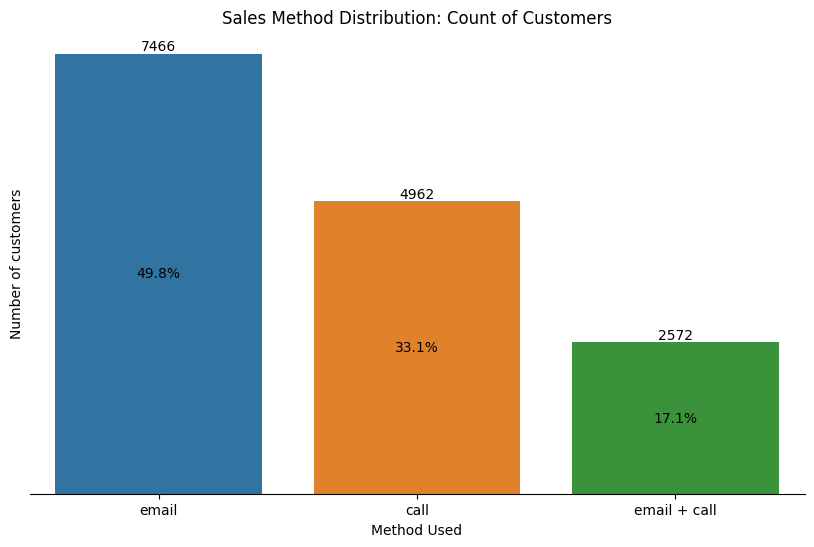

In [36]:
fig,ax=plt.subplots(figsize=(10,6))
order=['email','call','email + call']
sns.countplot(data=df,x='sales_method',ax=ax,order=order)

total = len(df)

for i in ax.containers:
    # For each bar, calculate the percentage and display it
    for rect in i:
        height = rect.get_height()
        count = int(height)
        percentage = '{:.1f}%'.format(100 * height/total)
        
        # Display the count above the bar
        ax.text(rect.get_x() + rect.get_width() / 2, height, count,
                ha='center', va='bottom')
        
        # Display the percentage inside the bar
        ax.text(rect.get_x() + rect.get_width() / 2, height/2, percentage,
                ha='center', va='center')

ax.set(yticklabels='')
ax.set_yticks([])
ax.set_xlabel('Method Used')
ax.set_ylabel("Number of customers")
ax.set_title('Sales Method Distribution: Count of Customers')
sns.despine(left=True)
plt.show()

This hypothesis also holds true when dividing the customers by how long they've been buying our products.<br>
We can see that both older and newer customers bought our product after an E-Mail than after a phone call.

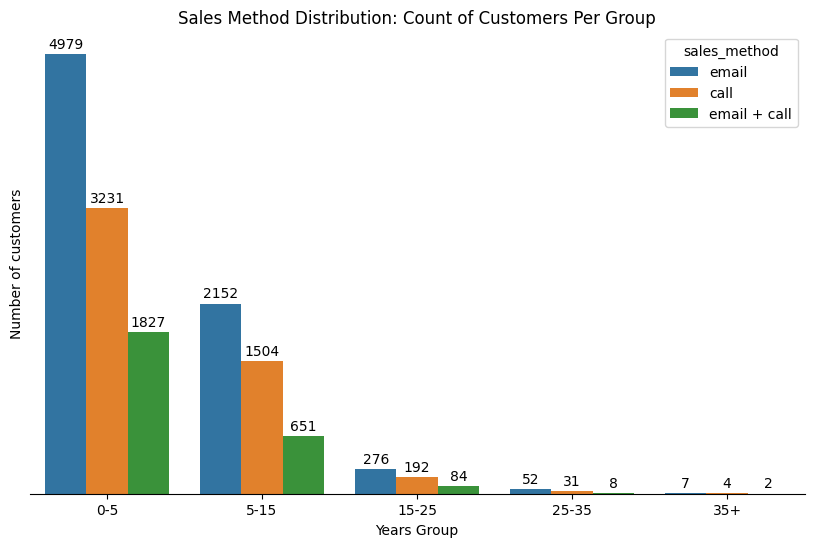

In [37]:
fig,ax=plt.subplots(figsize=(10,6))
order=['email','call','email + call']
sns.countplot(data=df,x='years_group',hue='sales_method',ax=ax,hue_order=order)

total = len(df)

#number of users per group
for i in ax.containers:
    ax.bar_label(i,padding=2)

ax.set(yticklabels='')
ax.set_yticks([])
ax.set_xlabel('Years Group')
ax.set_ylabel("Number of customers")
ax.set_title('Sales Method Distribution: Count of Customers Per Group')
sns.despine(left=True)
plt.show()

## **What does the spread of the revenue look like overall?**
Based on our dataset, We can see that the median revenue of our sales is about 90$ and the IQR is about 53 <br>
But taking a closer look on our Sales Method reveals more

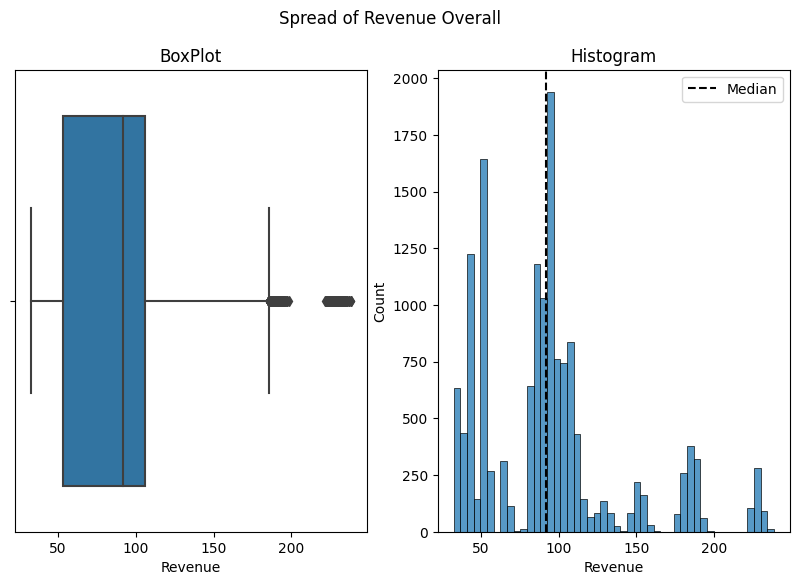

In [38]:
fig,(ax0,ax1)=plt.subplots(figsize=(10,6),ncols=2,sharex=True)
sns.boxplot(data=df,x='revenue',ax=ax0)
ax0.set_xlabel('Revenue')
ax0.set_ylabel("")
ax0.set_title('BoxPlot')

sns.histplot(data=df,x='revenue',ax=ax1)
median = df['revenue'].median()
ax1.axvline(median, color='black', linestyle='--',label='Median')
ax1.set_xlabel('Revenue')
ax1.set_ylabel("Count")
ax1.set_title('Histogram')

fig.suptitle("Spread of Revenue Overall")
plt.legend()

plt.show()

We can see that 'E-mails + calls' Method has a higher average and range from the other 2 methods <br>
Which could mean that people who are recieve both an email and call are more likely to spend more money but we need to test this hypothesis

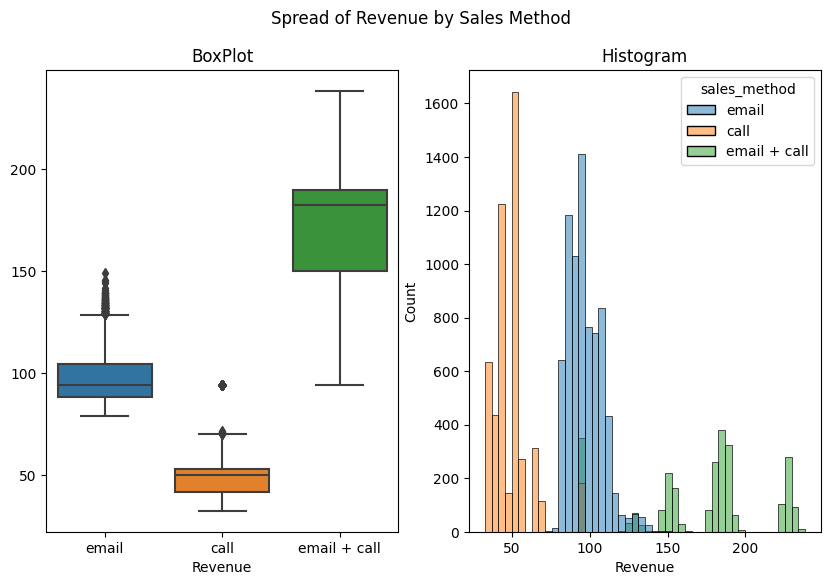

In [39]:
fig,(ax0,ax1)=plt.subplots(figsize=(10,6),ncols=2)

order=['email','call','email + call']

sns.boxplot(data=df,y='revenue',x='sales_method',ax=ax0,order=order)
ax0.set_xlabel('Revenue')
ax0.set_ylabel("")
ax0.set_title('BoxPlot')

sns.histplot(data=df,x='revenue',hue='sales_method',ax=ax1,hue_order=order)
ax1.set_xlabel('Revenue')
ax1.set_ylabel("Count")
ax1.set_title('Histogram')

fig.suptitle("Spread of Revenue by Sales Method")

plt.show()

**H0**: people who get an email and call are **not** more likely to spend money than people who just get an email <br>
**H1**: people who get an email and call are more likely to spend money than people who just get an email <br>
Let α=0.05

In [40]:
!pip install pingouin
import pingouin

In [41]:
emails=df.query('sales_method == "email"')['revenue']
both=df.query('sales_method == "email + call"')['revenue']
pingouin.ttest(both,emails,alternative='greater')

/opt/conda/lib/python3.10/site-packages/pingouin/bayesian.py:152: RuntimeWarning:

divide by zero encountered in double_scalars



,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,91.311562,2695.868444,greater,0.0,"[73.24, inf]",3.281992,inf,1.0


Since the p-val is < 0.05, we reject the null hypothesis <br>
We can conclude that people who get an email and call are more likely to spend money

## Was there any difference in revenue over time for each of the methods? <br>
We can see that in the first 4 weeks of a product's launch, email is the dominate sales method.<br>
But after the 4th week, 'email + call' gains a much higher revenue share than the other 2 methods.<br>
calling on its own remains a low return method throughout the first 6 weeks of a product's launch

In [42]:
grouped = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

fig = px.area(data_frame=grouped, x='week', y='revenue',color='sales_method',\
             title='Revenue Over Time')

for annotation in fig.layout.annotations:
    annotation.text = ""
    
fig.update_layout(title_x=0.5,autosize=False, width=10*80, height=7*80)
    
fig.show()

Here we can see the percecntage of revenue from each method per week returns <br>
we can see that emails only usually return the highest percentages,with emails + call coming in second

In [43]:
total_revenue = grouped['revenue'].sum()

# Calculate percentage for each group
grouped['percentage'] = grouped['revenue'] / total_revenue * 100

grouped['week'] = "Week " + grouped['week'].astype(str)

# Create sunburst chart
fig = px.sunburst(grouped, values='percentage', path=['sales_method','week'],\
                 title='Percentage of Total Revenue of Each Sales Method per Week')


fig.update_traces(sort=False, selector=dict(type='sunburst'),textinfo='label+percent entry') 

fig.update_layout(title_x=0.5)
fig.show()

## The Revenue of each Method compaired <br>
We compare each sales method revenue to the average of all 3 methods (indicated by the black line): <br>
- E-Mails: exceeds the mean by a wide margin, almost double
- E-Mails + calls: barely falls short of the mean, could be improved
- Calls: barely passes 50% of the mean

In [44]:
emailrev=df.query("sales_method == 'email'")['revenue'].sum()
callrev=df.query("sales_method == 'call'")['revenue'].sum()
bothrev=df.query("sales_method == 'email + call'")['revenue'].sum()
totmean=(emailrev+callrev+bothrev)/3

fig = go.Figure()

fig.add_trace(go.Indicator(mode = "number+gauge+delta",
                           gauge = {'shape': "bullet",'threshold': {'line': {'color': "black", 'width': 2},
                                    'thickness': 0.75,'value': totmean},
                                    'axis': {'range': [None, 750000]}},
                           value = emailrev,
                           delta = {'reference': totmean},domain = {'x': [0.2, 1], 'y':[0.7,0.9]},
                           title = {'text': "Email Revenue"}))

fig.add_trace(go.Indicator(mode = "number+gauge+delta",
                           gauge = {'shape': "bullet",'threshold': {'line': {'color': "black", 'width': 2},
                                    'thickness': 0.75,'value': totmean},
                                    'axis': {'range': [None, 750000]}},
                           value = callrev,
                           delta = {'reference': totmean},domain = {'x': [0.2, 1], 'y': [0.4, 0.6]},
                           title = {'text': "Call Revenue"}))

fig.add_trace(go.Indicator(mode = "number+gauge+delta",
                           gauge = {'shape': "bullet",'threshold': {'line': {'color': "black", 'width': 2},
                                    'thickness': 0.75,'value': totmean},
                                    'axis': {'range': [None, 750000]}},
                           value = bothrev,
                           delta = {'reference': totmean},domain = {'x': [0.2, 1], 'y': [0.08, 0.25] },
                           title = {'text': "Both Revenue"}))

fig.update_layout(title='Comparative Analysis of Revenue by Sales Method',title_x=0.5)

fig.show()

## Business Metrics
Since our goal is to determine which sales methods are more effective, i would recommend total revenue per method as our metric

Based on our data, 50% of customers bought the product after receiving an E-Mail, and 17% more bought the product after receiving an E-Mail and a Call . Therefore, if these numbers are increasing in the next 6 month, it indicates very good sign to achieve our goal.

## Recommendation
For the following weeks, I would recommend we can focus on the following steps: <br>
- Increasing the number of E-Mails sent to customers as they have the highest % of revenue
- Increasing the numbers of E-Mails + calls, as people who receive them are more likely to pay more
- Decrease the numbers of Calls only, as they take more time and effort than the other 2 methods and their returns aren't as high
- Using key metrics to monitor whether there is a strong sign to see the sales will increase.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation